In [38]:
import pandas as pd
import pickle as pkl
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [39]:
df = pd.read_csv("asset/HR_comma_sep.csv")

In [40]:
df = pd.get_dummies(df, columns=["sales", "salary"], drop_first=True)

In [41]:
X = df.drop("left", axis=1)
y = df["left"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
model = SVC()
model.fit(X_train_scaled, y_train)

SVC()

In [45]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [46]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7843333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      2294
           1       0.98      0.08      0.16       706

    accuracy                           0.78      3000
   macro avg       0.88      0.54      0.52      3000
weighted avg       0.83      0.78      0.71      3000



In [47]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9883333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2294
           1       0.99      0.96      0.97       706

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [51]:
y_pred = logreg_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7843333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.57      0.34      0.42       706

    accuracy                           0.78      3000
   macro avg       0.69      0.63      0.65      3000
weighted avg       0.76      0.78      0.76      3000



In [52]:
with open("model.pkl", "wb") as f:
    pickle.dump(rf_model, f)

print("Model berhasil disimpan ke model.pkl")

Model berhasil disimpan ke model.pkl


In [53]:
correlation_matrix = df.corr(numeric_only=True)

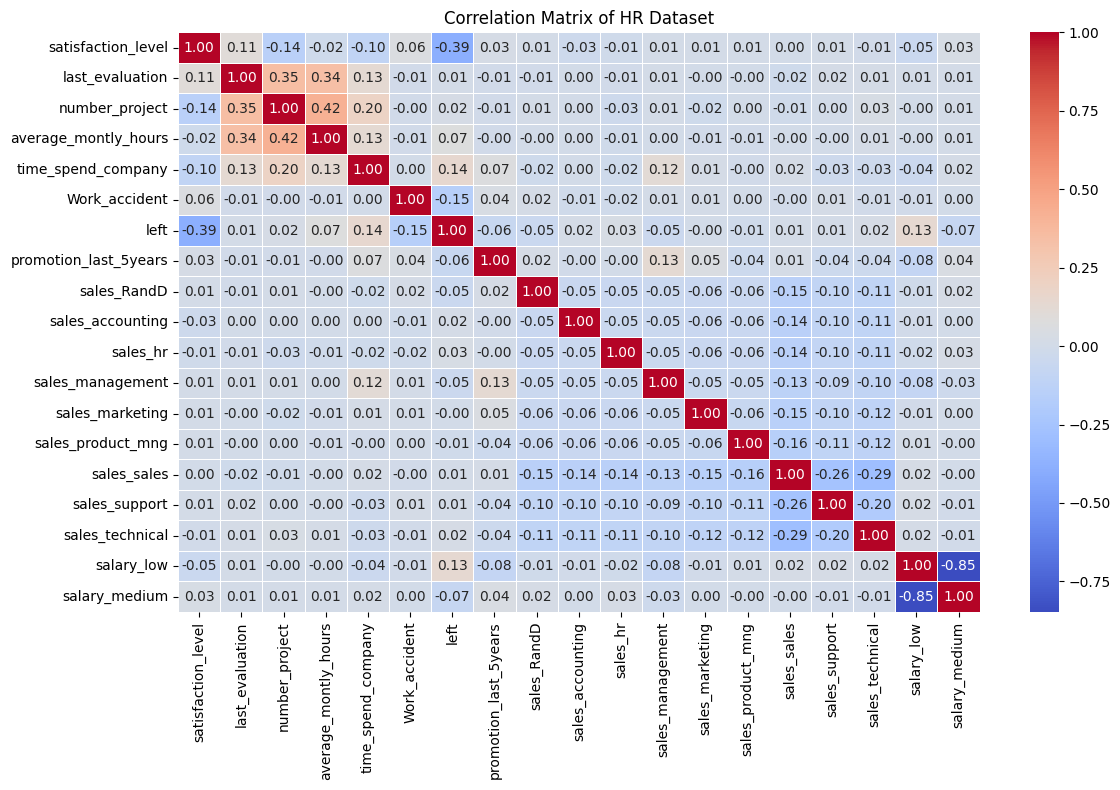

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of HR Dataset")
plt.tight_layout()
plt.show()